<a href="https://colab.research.google.com/github/guo8orou/github/blob/%EA%B5%90%ED%86%B5%EC%82%AC%EA%B3%A0%EB%8D%B0%EC%9D%B4%ED%84%B0/%EB%82%A0%EC%94%A8%EC%8B%9C%EA%B0%81%ED%99%94_%EC%86%90%ED%98%9C%EB%A6%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#교통사고 데이터분석

날씨와 사고건수 사이 간단한 시각화

시각화에 앞서 matplotlib.pyplot 사용할 때
한글 폰트가 깨지는 문제부터 해결하겠습니다

In [44]:
#문제 해결하지 않았음
!apt install fonts-nanum

https://jimmy-ai.tistory.com/19?category=984046


https://blog.naver.com/indi800/222472323131


plt 한글 깨짐 해결

정보글 내용을 정리하면 
1. 아래 두 코드 실행
2. 런타임 > 런타임 다시 시작
3.  이후 처음부터 차례로 실행하면 되는듯합니다...


In [5]:
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [7]:
#헉 위 코드 실행 후 NanumGothic 생겼다 ㅠㅠ
[font.name for font in fm.fontManager.ttflist]

['DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif Display',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXGeneral',
 'cmb10',
 'cmr10',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmsy10',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmss10',
 'STIXSizeThreeSym',
 'cmmi10',
 'DejaVu Sans',
 'NanumGothicCoding',
 'Nanum Brush Script',
 'Liberation Serif',
 'NanumGothicCoding',
 'NanumSquare',
 'NanumSquareRound',
 'Liberation Mono',
 'NanumBarunGothic',
 'Nanum Pen Script',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'NanumMyeongjo Eco',
 'Liberation Mono',
 'NanumSquareRound',
 'NanumSquare',
 'Liberation Serif',
 'NanumS

In [33]:
print(matplotlib.rcParams['font.family'])

['NanumGothic']


In [39]:
#plt 화질 높이기
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [10]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/꿔8로우/data/통합_날씨추가_손혜린.csv')

In [41]:
df.head(3)

,Unnamed: 0,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수,날씨,날씨개수,낮은안개,눈,달무리,달코로나,무지개,박무,비,소나기,소낙눈,싸락눈,싸락우박,안개,안개비,연무,우박,진눈깨비,채운,햇무리,황사,없음,월,연
0,0,2017-01-01,73,2,25,90,10,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
1,1,2017-01-02,82,4,27,92,17,비 박무 연무,3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
2,2,2017-01-03,88,1,25,80,13,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17


우선 연, 월 인덱스를 만들겠습니다 

In [76]:
def month(x):
  return x[5:7]

def year(x):
  return x[2:4]

def day(x):
  return x[-2:]

In [12]:
df['월']=df.발생일.apply(month)

In [13]:
df['연']=df.발생일.apply(year)

In [77]:
df['일']=df.발생일.apply(day)

In [14]:
#정말 편리합니다~
df.head(3)

,Unnamed: 0,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수,날씨,날씨개수,낮은안개,눈,달무리,달코로나,무지개,박무,비,소나기,소낙눈,싸락눈,싸락우박,안개,안개비,연무,우박,진눈깨비,채운,햇무리,황사,없음,월,연
0,0,2017-01-01,73,2,25,90,10,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
1,1,2017-01-02,82,4,27,92,17,비 박무 연무,3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
2,2,2017-01-03,88,1,25,80,13,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17


빠르게 박무 / 연무 / 안개 와 사고수의 관계를 보겠습니다

이따 사망자수, 중상자수도 봐보죠


In [34]:
gd1=df.groupby(['연','월'])['사고건수','날씨개수','안개','황사','비','눈'].sum()

In [35]:
#인덱스를 치워버리겠습니다
ri_gd1=gd1.reset_index()

In [36]:
ri_gd1.head(4)
#좋습니다~ 이제 

,연,월,사고건수,날씨개수,안개,황사,비,눈
0,17,01,3166,55,0,1,5,8
1,17,02,2728,47,2,0,6,3
2,17,03,3098,51,0,0,6,2
3,17,04,3172,49,1,1,10,0


잠시 알아보는 sns 색 변경

In [23]:
#팔레트 컬러 확인 가능, 마음에 들면 해당 팔레트로 지정해 사용
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

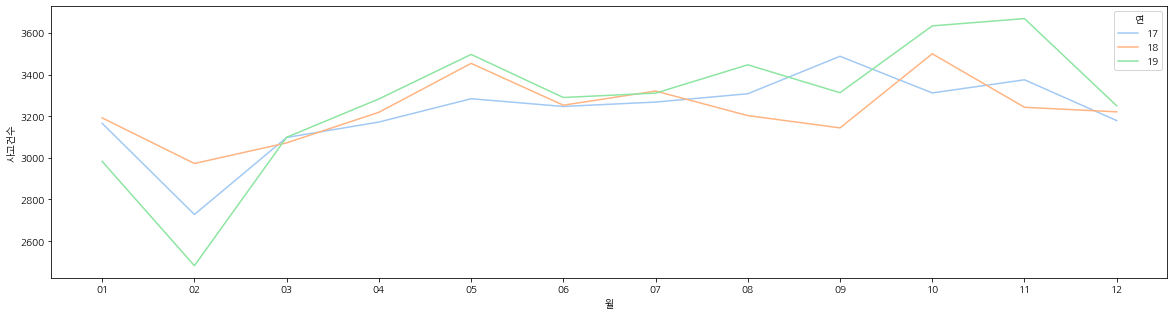

In [27]:
plt.figure(figsize=(20,5))
plt.rc('font', family='NanumGothic')
sns.lineplot(x='월',y='사고건수', hue='연', data=ri_gd1, palette='pastel', legend='full')
plt.show()

또는 직접 색 list 지정 (아래는 컬러 링크)

https://matplotlib.org/stable/gallery/color/named_colors.html

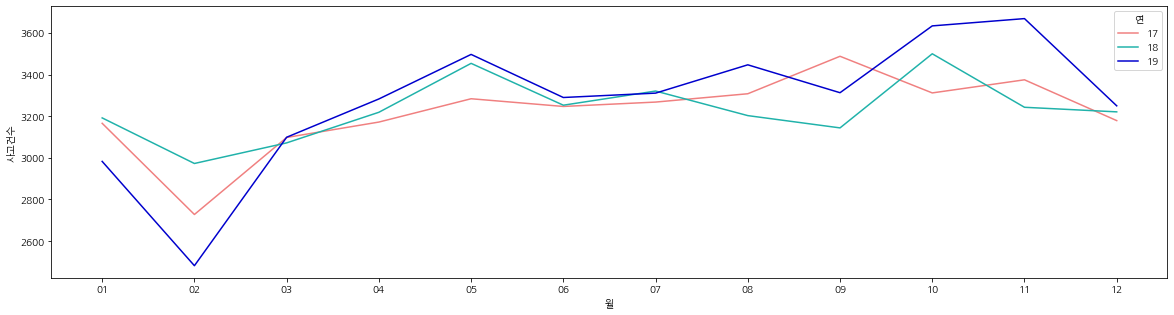

In [33]:
plt.figure(figsize=(20,5))
plt.rc('font', family='NanumGothic')
sns.lineplot(x='월',y='사고건수', hue='연', data=ri_gd1, palette=['lightcoral','lightseagreen','mediumblue'], legend='full')
plt.show()

#월과 사고수에는 대략적 추세가 있는 것 같습니다. (기후와의 연관성을 판단할 때 함께 고려해야할 부분일 것 같습니다)

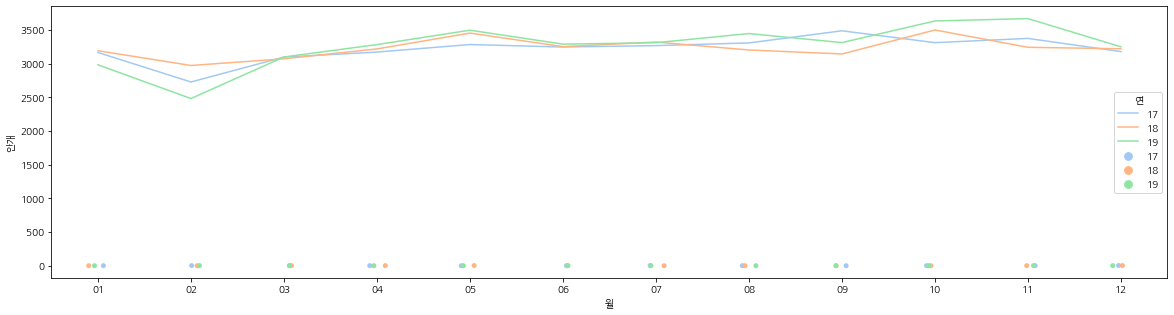

In [37]:
plt.figure(figsize=(20,5))
plt.rc('font', family='NanumGothic')
sns.lineplot(x='월',y='사고건수', hue='연', data=ri_gd1, palette='pastel', legend='full')
sns.stripplot(x='월', y='안개', hue='연', data=ri_gd1, palette='pastel')
plt.show()

#아맞다..표준화..

In [45]:
def ssc(x):
  import numpy as np
  m=np.mean(x)
  s=np.std(x)
  return pd.Series([(i-m)/s for i in x])

In [46]:
ri_gd1['표준사고건수']=ssc(ri_gd1['사고건수'])
ri_gd1['표준안개']=ssc(ri_gd1['안개'])

In [49]:
#아예 상관계수를 봐보죠 
import numpy as np
np.corrcoef(ri_gd1.표준사고건수, ri_gd1.표준안개)

#매우 낮군요..^^

array([[ 1.        , -0.21411622],
       [-0.21411622,  1.        ]])

In [58]:
ri_gd2=pd.DataFrame(ri_gd1.groupby('월')['사고건수','안개'].sum())

In [60]:
ri_gd2.head(3)

,사고건수,안개
월,,
01,9341,0
02,8183,3
03,9269,2


In [63]:
ri_gd2.reset_index(inplace=True)

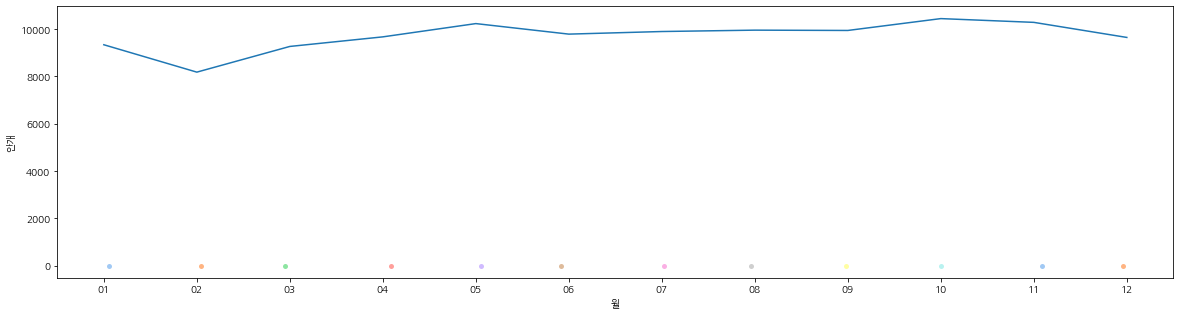

In [64]:
plt.figure(figsize=(20,5))
plt.rc('font', family='NanumGothic')
sns.lineplot(x='월',y='사고건수', data=ri_gd2, palette='pastel', legend='full')
sns.stripplot(x='월', y='안개', data=ri_gd2, palette='pastel')
plt.show()

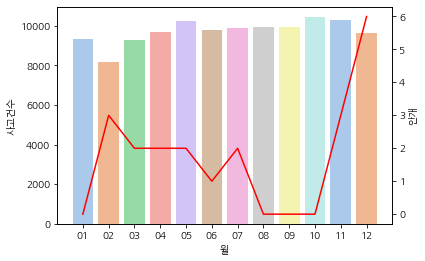

In [71]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

sns.barplot(x='월',y='사고건수', data=ri_gd2, palette='pastel', ax=ax1)
sns.lineplot(x='월', y='안개', data=ri_gd2, color='red', ax = ax2)

ax1.set_xlabel('월')
ax1.set_ylabel('사고건수', color='k')
ax2.set_ylabel('안개', color='k')

plt.show()

#와! 정말 관계 없어 보입니다. 월별로 통합되어서 유의미한 인사이트를 주지 못합니다.
#이럴줄 알고 우리가 데이터를 일별로 수집했죠

In [73]:
df.head()

,Unnamed: 0,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수,날씨,날씨개수,낮은안개,눈,달무리,달코로나,무지개,박무,비,소나기,소낙눈,싸락눈,싸락우박,안개,안개비,연무,우박,진눈깨비,채운,햇무리,황사,없음,월,연
0,0,2017-01-01,73,2,25,90,10,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
1,1,2017-01-02,82,4,27,92,17,비 박무 연무,3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
2,2,2017-01-03,88,1,25,80,13,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
3,3,2017-01-04,115,1,39,99,25,박무 연무,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,01,17
4,4,2017-01-05,103,1,34,111,8,없음,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,01,17


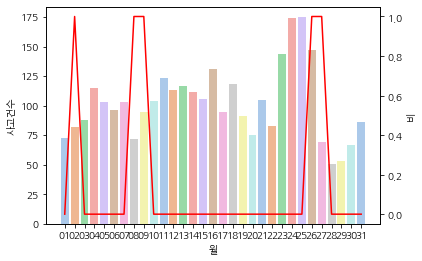

In [85]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

sns.barplot(x='일',y='사고건수', data=df[:31], palette='pastel', ax=ax1)
sns.lineplot(x='일', y='비', data=df[:31], color='red', ax = ax2)

ax1.set_xlabel('월')
ax1.set_ylabel('사고건수', color='k')
ax2.set_ylabel('비', color='k')

plt.show()

#관계가 있...나?

In [87]:
#아예 여름을 봐보겠습니다
31+28+31+30+31+30

181

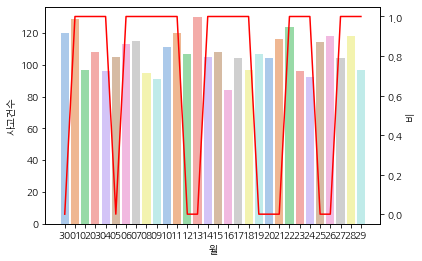

In [89]:
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

sns.barplot(x='일',y='사고건수', data=df[180:210], palette='pastel', ax=ax1)
sns.lineplot(x='일', y='비', data=df[180:210], color='red', ax = ax2)

ax1.set_xlabel('월')
ax1.set_ylabel('사고건수', color='k')
ax2.set_ylabel('비', color='k')

plt.show()


#음................그렇습니다.

In [91]:
df['월일']=df['월']+df['일']



0       1
1       2
2       1
3       1
4       0
       ..
1090    0
1091    0
1092    1
1093    3
1094    0
Name: 날씨개수, Length: 1095, dtype: int64

In [92]:
#차라리 날씨개수가 상관있을지도 모르겠습니다.
#참고로 날씨개수에는 없음도 1 더해지기 때문에 1씩 빼주겠습니다

df['날씨개수'] = df['날씨개수']-1

0       2
1       3
2       2
3       2
4       1
       ..
1090    1
1091    1
1092    2
1093    4
1094    1
Name: 날씨개수, Length: 1095, dtype: int64

In [95]:
df.loc[180:240]['날씨개수']

180    2
181    3
182    2
183    2
184    3
      ..
236    2
237    1
238    1
239    2
240    1
Name: 날씨개수, Length: 61, dtype: int64

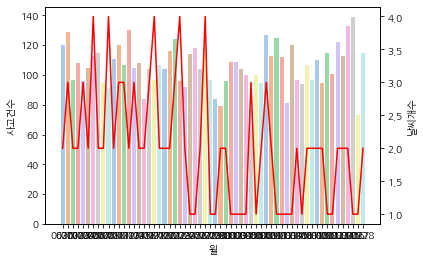

In [93]:
#7,8월 장마철의 날씨개수와 

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

sns.barplot(x='월일',y='사고건수', data=df[180:240], palette='pastel', ax=ax1)
sns.lineplot(x='월일', y='날씨개수', data=df[180:240], color='red', ax = ax2)

ax1.set_xlabel('월')
ax1.set_ylabel('사고건수', color='k')
ax2.set_ylabel('날씨개수', color='k')

plt.show()

#오..! 진짜 관련 없어 보입니다.

#음...그렇습니다...

In [101]:
df.columns #날씨, 사고유형을 긁어옵니다

Index(['Unnamed: 0', '발생일', '사고건수', '사망자수', '중상자수', '경상자수', '부상신고자수', '날씨',
       '날씨개수', '낮은안개', '눈', '달무리', '달코로나', '무지개', '박무', '비', '소나기', '소낙눈',
       '싸락눈', '싸락우박', '안개', '안개비', '연무', '우박', '진눈깨비', '채운', '햇무리', '황사', '없음',
       '월', '연', '일', '월일'],
      dtype='object')

In [105]:
for wet in ['낮은안개', '눈', '달무리', '달코로나', '무지개', '박무', '비', '소나기', '소낙눈',
       '싸락눈', '싸락우박', '안개', '안개비', '연무', '우박', '진눈깨비', '채운', '햇무리', '황사']:
       for acc in ['사고건수', '사망자수', '중상자수']:
         print(wet, '일 때 ', acc, '는 ', np.round(df[df[wet]==1][acc].mean(),1), ' 건')

낮은안개 일 때  사고건수 는  108.5  건
낮은안개 일 때  사망자수 는  1.0  건
낮은안개 일 때  중상자수 는  31.5  건
눈 일 때  사고건수 는  106.4  건
눈 일 때  사망자수 는  0.9  건
눈 일 때  중상자수 는  30.9  건
달무리 일 때  사고건수 는  75.0  건
달무리 일 때  사망자수 는  1.0  건
달무리 일 때  중상자수 는  28.5  건
달코로나 일 때  사고건수 는  95.0  건
달코로나 일 때  사망자수 는  0.3  건
달코로나 일 때  중상자수 는  26.3  건
무지개 일 때  사고건수 는  111.5  건
무지개 일 때  사망자수 는  1.0  건
무지개 일 때  중상자수 는  30.0  건
박무 일 때  사고건수 는  106.2  건
박무 일 때  사망자수 는  0.8  건
박무 일 때  중상자수 는  30.7  건
비 일 때  사고건수 는  106.4  건
비 일 때  사망자수 는  0.9  건
비 일 때  중상자수 는  30.4  건
소나기 일 때  사고건수 는  111.5  건
소나기 일 때  사망자수 는  0.8  건
소나기 일 때  중상자수 는  30.4  건
소낙눈 일 때  사고건수 는  113.0  건
소낙눈 일 때  사망자수 는  1.0  건
소낙눈 일 때  중상자수 는  29.0  건
싸락눈 일 때  사고건수 는  99.5  건
싸락눈 일 때  사망자수 는  0.0  건
싸락눈 일 때  중상자수 는  25.5  건
싸락우박 일 때  사고건수 는  127.2  건
싸락우박 일 때  사망자수 는  1.0  건
싸락우박 일 때  중상자수 는  32.5  건
안개 일 때  사고건수 는  104.7  건
안개 일 때  사망자수 는  0.9  건
안개 일 때  중상자수 는  32.3  건
안개비 일 때  사고건수 는  110.1  건
안개비 일 때  사망자수 는  0.8  건
안개비 일 때  중상자수 는  31.2  건
연무 일 때  사고건수 는  105.2  건
연무 일 때  사망자수

In [114]:
x=['낮은안개', '눈', '박무', '비', '소나기', '소낙눈', '싸락눈', '싸락우박',
            '안개', '안개비', '연무', '우박', '진눈깨비', '채운', '햇무리', '황사']
for acc in ['사고건수', '사망자수']:
    print(acc,' :')
    for wet in x:
         print(wet, ':', np.round(df[df[wet]==1][acc].mean(),1), '건')

사고건수  :
낮은안개 : 108.5 건
눈 : 106.4 건
박무 : 106.2 건
비 : 106.4 건
소나기 : 111.5 건
소낙눈 : 113.0 건
싸락눈 : 99.5 건
싸락우박 : 127.2 건
안개 : 104.7 건
안개비 : 110.1 건
연무 : 105.2 건
우박 : 106.7 건
진눈깨비 : 106.8 건
채운 : 107.9 건
햇무리 : 105.1 건
황사 : 103.8 건
사망자수  :
낮은안개 : 1.0 건
눈 : 0.9 건
박무 : 0.8 건
비 : 0.9 건
소나기 : 0.8 건
소낙눈 : 1.0 건
싸락눈 : 0.0 건
싸락우박 : 1.0 건
안개 : 0.9 건
안개비 : 0.8 건
연무 : 0.8 건
우박 : 2.0 건
진눈깨비 : 0.9 건
채운 : 1.4 건
햇무리 : 0.8 건
황사 : 0.9 건


In [119]:
y=[]

for wet in x:
    y.append(np.round(df[df[wet]==1]['사고건수'].mean(),1))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

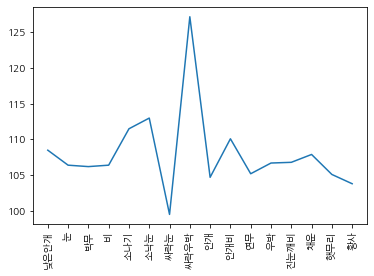

In [123]:
sns.lineplot(x,y)
plt.xticks(rotation=90)

#싸락우박이 왜이렇게 높지... 눈이나 우박보다 위험한가..?
#싸락우박, 소나기, 소낙눈, 안개비?

싸락우박을 좀더 보겠습니다...

In [124]:
#아? 데이터가 4개뿐이네요
#이유를 알겠습니다. 이 날에 온갖 날씨가 다 모였군요...

df[df['싸락우박']==1]

,Unnamed: 0,발생일,사고건수,사망자수,중상자수,경상자수,부상신고자수,날씨,날씨개수,낮은안개,눈,달무리,달코로나,무지개,박무,비,소나기,소낙눈,싸락눈,싸락우박,안개,안개비,연무,우박,진눈깨비,채운,햇무리,황사,없음,월,연,일,월일
316,316,2017-11-13,120,1,38,98,16,비 소나기 싸락우박 박무 연무,5,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,11,17,13,1113
803,803,2019-03-15,139,2,33,137,15,비 소나기 진눈깨비 싸락우박 박무 연무,6,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,03,19,15,0315
811,811,2019-03-23,128,1,29,133,23,비 소나기 눈 진눈깨비 소낙눈 싸락우박,6,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,03,19,23,0323
818,818,2019-03-30,122,0,30,129,13,비 안개비 소나기 싸락우박 박무 연무,6,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,03,19,30,0330


 다른 변수와 관계없이 일정량의 사고건수가 정해져있고 변수들은 그 수의 증감에 미미한 영향을 미칠 뿐이라고 생각한다면 전체에서 평균 사고수 빼버리고 시각화하는건 어떨지 싶습니다 (이게 ssc 표준화보다 나을지는 해봐야 알듯...)



---



아마 날씨 변수는 특정 날씨 한두개가 유의미하다기보단 특정 개수 이상 특정 날씨들의 조합일 때 사고발생율을 더 높이는 것이 아닌가 추측합니다.

 -> 다음 과제.

